## 5 Diferenças entre AdaBoost e GBM:

* Algoritmo Base: AdaBoost utiliza modelos simples como stumps de decisão, enquanto GBM usa árvores de decisão mais profundas.  
* Erro e Gradiente: AdaBoost foca em corrigir erros de classificação, enquanto GBM minimiza um gradiente da função de perda.  
* Reamostragem vs Resíduos: AdaBoost ajusta pesos das amostras para cada iteração, GBM ajusta diretamente os resíduos do modelo anterior.  
* Hiperparâmetros: GBM tem maior complexidade devido a parâmetros como profundidade das árvores, taxa de aprendizado e número de iterações.  
* Versatilidade: GBM pode ser ajustado para diferentes funções de perda (ex.: regressão, classificação, etc.), enquanto AdaBoost é principalmente usado para classificação.


## Exemplos de Classificação e Regressão com Gradient Boosting Machine (GBM) 

Este notebook demonstra como utilizar o Gradient Boosting Machine (GBM) para resolver problemas de classificação e regressão. Os exemplos foram adaptados da documentação do Scikit-learn.

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris, load_diabetes


## Exemplo 1: Classificação com GBM

In [9]:

# Carregando o dataset Iris
data = load_iris()
X, y = data.data, data.target

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo GBM
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Previsões e avaliação
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


## Exemplo 2: Regressão com GBM

In [11]:

# Carregando o dataset Diabetes
data = load_diabetes()
X, y = data.data, data.target

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo GBM
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
reg.fit(X_train, y_train)

# Previsões e avaliação
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 3071.45


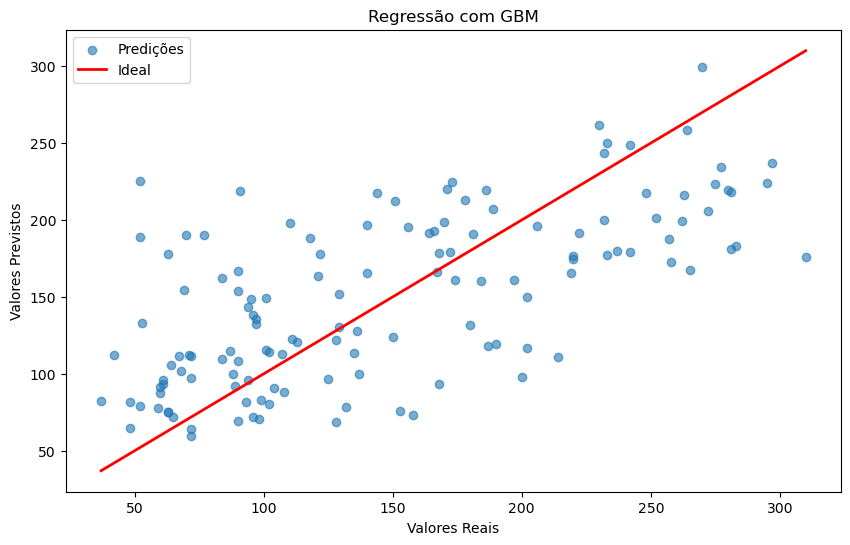

In [12]:

# Visualizando resultados para regressão
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predições")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Ideal")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão com GBM")
plt.legend()
plt.show()


## 5 Hiperparâmetros importantes no GBM:

* n_estimators: Número de árvores no modelo.  
* learning_rate: Taxa de aprendizado que regula a contribuição de cada árvore.  
* max_depth: Profundidade máxima das árvores.  
* min_samples_split: Número mínimo de amostras necessárias para dividir um nó.  
* subsample: Fração de amostras usadas em cada iteração (para GBM estocástico).

## GridSearch para otimizar hiperparâmetros: 

Você pode utilizar o GridSearchCV para buscar os melhores hiperparâmetros para GBM, otimizando o desempenho com base na métrica escolhida (ex.: precisão, RMSE). Um exemplo seria algo como:

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


## Diferença entre GBM e Stochastic GBM (SGBM):  
A principal diferença está na amostragem. O SGBM incorpora estocasticidade ao utilizar apenas uma fração aleatória dos dados em cada iteração (subsample < 1.0), o que reduz overfitting e acelera o treinamento, enquanto o GBM tradicional usa todos os dados em cada etapa. Este conceito foi introduzido por Jerome Friedman no artigo Stochastic Gradient Boosting​
SCIKIT-LEARN.